# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3

In [ ]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/SD202-Databases/wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
AllWines:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Producer:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
Production:
  0: NV(NUM)
  1: CRU(TEXT)
  2: QTE(NUM)
  3: NP(NUM)
  4: REGION(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Sales:
  0: NV(NUM)
  1: LIEU(TEXT)
  2: QTE(NUM)
  3: NB(NUM)
  4: REGION(TEXT)
WineProd:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
WineSales:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
WineTable:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we will use **`%%sql`** magic for our queries

In [ ]:
%load_ext sql
%sql sqlite:////content/drive/MyDrive/SD202-Databases/wine.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @/content/drive/MyDrive/SD202-Databases/wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [ ]:
%%sql DROP TABLE IF EXISTS WineProd;

-- Creating Wine table
CREATE TABLE WineProd AS
SELECT DISTINCT NV, CRU, DEGRE, MILL
FROM MASTER1
WHERE NV IS NOT NULL;

SELECT *
FROM WineProd

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NV,CRU,DEGRE,MILL
1,Mercurey,11.5,1980
2,Julienas,11.3,1974
3,Savigny les Beaunes,12.1,1978
4,Mercurey,10.9,1980
5,Pommard,11.7,1976
6,Mercurey,11.2,1981
7,Grands Echezeaux,11.7,1968
8,Cotes de Beaune Villages,12.3,1975
9,Chapelle Chambertin,11.9,1973
10,Beaujolais Villages,11.8,1979


In [ ]:
%%sql DROP TABLE IF EXISTS Production;

-- Creating Production table
CREATE TABLE Production AS
SELECT DISTINCT NV, CRU, QTE, NP, REGION
FROM MASTER1
WHERE NV IS NOT NULL;

SELECT *
FROM Production;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NV,CRU,QTE,NP,REGION
1,Mercurey,300,1,Alsace
1,Mercurey,1,73,Jura
2,Julienas,100,5,Bourgogne
3,Savigny les Beaunes,400,1,Alsace
4,Mercurey,35,10,Bourgogne
5,Pommard,46,30,Bourgogne
6,Mercurey,300,42,Bourgogne
7,Grands Echezeaux,60,98,Rhone
8,Cotes de Beaune Villages,12,90,Rhone
9,Chapelle Chambertin,None,None,None


In [ ]:
%%sql DROP TABLE IF EXISTS Producer;

-- Creating Producer table
CREATE TABLE Producer AS
SELECT DISTINCT NP, NOM, PRENOM
FROM MASTER1
WHERE NP IS NOT NULL
ORDER BY NP;

SELECT *
FROM Producer;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NP,NOM,PRENOM
1,Bohn,Rene
2,Boxler,Albert
3,Six,Paul
4,Stentz,Fernand
5,Joudeat,Lucien
6,Marmagne,Bernard
7,Lasnier,Pierre
8,Lioger d'Harduy,Gabriel
9,Moniot,Gilbert
10,Fournier,Jean Claude


In [ ]:
%%sql DROP TABLE IF EXISTS WineSales;

-- Creating Wine Sales table
CREATE TABLE WineSales AS
SELECT DISTINCT NV, CRU, DEGRE, MILL
FROM MASTER2
WHERE NV IS NOT NULL;

SELECT *
FROM WineSales;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NV,CRU,DEGRE,MILL
1,Mercurey,11.5,1980
2,Julienas,11.3,1974
3,Savigny les Beaunes,12.1,1978
4,Mercurey,10.9,1980
5,Pommard,11.7,1976
6,Mercurey,11.2,1981
7,Grands Echezeaux,11.7,1968
8,Cotes de Beaune Villages,12.3,1975
9,Chapelle Chambertin,11.9,1973
10,Beaujolais Villages,11.8,1979


In [ ]:
%%sql DROP TABLE IF EXISTS Sales;

-- Creating  Sales table
CREATE TABLE Sales AS
SELECT DISTINCT NV, LIEU, QTE, NB, REGION
FROM MASTER2
WHERE NV IS NOT NULL;

SELECT *
FROM Sales;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NV,LIEU,QTE,NB,REGION
1,BORDEAUX,33,2,NOUVELLE-AQUITAINE
1,PARIS,1,44,ÎLE-DE-FRANCE
1,RENNES,1,45,BRETAGNE
2,LYON,2,48,AUVERGNE-RHÔNE-ALPES
3,NICE,6,7,PROVENCE-ALPES-CÔTE D'AZUR
3,MERCUREY,5,49,BOURGOGNE-FRANCHE-COMTÉ
4,TOULOUSE,12,8,OCCITANIE
4,PARIS,6,44,ÎLE-DE-FRANCE
4,SENS,4,50,BOURGOGNE-FRANCHE-COMTÉ
5,MERCUREY,50,2,BOURGOGNE-FRANCHE-COMTÉ


In [ ]:
%%sql

DELETE 
FROM Sales
WHERE LIEU IS NULL 
      AND	QTE IS NULL
      AND	NB IS NULL
      AND	REGION IS NULL

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
55 rows affected.


[]

In [ ]:
%%sql DROP TABLE IF EXISTS Client;

-- Creating Client table
CREATE TABLE Client AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL
ORDER BY NB;

SELECT *
FROM Client;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [ ]:
%%sql DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW bons_buveurs AS
SELECT NB, NOM, PRENOM, TYPE
FROM Client
WHERE TYPE = 'gros' OR TYPE = 'moyen'

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.


[]

In [ ]:
%%sql
SELECT * FROM bons_buveurs ORDER BY nb

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [ ]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [ ]:
%%sql DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW buveurs_asec AS
SELECT DISTINCT Client.NB, NOM, PRENOM, TYPE
FROM Client, Sales
WHERE Client.NB NOT IN 
      ( SELECT Sales.NB 
        FROM Sales)
ORDER BY Client.NB


 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.


[]

In [ ]:
%%sql
SELECT * FROM buveurs_asec ORDER BY nb

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [ ]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [ ]:
%%sql DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW buveurs_achats AS
SELECT DISTINCT Client.NB, NOM, PRENOM, TYPE
FROM Client, Sales
WHERE Client.NB IN 
      ( SELECT Sales.NB 
        FROM Sales)
ORDER BY Client.NB


 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.


[]

In [ ]:
%%sql
SELECT * FROM buveurs_achats ORDER BY nb

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


In [ ]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [ ]:
%%sql DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS
SELECT LIEU, CRU, COUNT(QTE) AS QTE_BUE
FROM WineSales, Sales
WHERE Sales.NV IN 
      ( SELECT WineSales.NV 
        FROM WineSales)
      AND
      WineSales.MILL = 1983
GROUP BY CRU


 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.


[]

In [ ]:
%%sql
SELECT * FROM q83pl 

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


LIEU,CRU,QTE_BUE
CANNES,Beaujolais Primeur,73
CANNES,Chiroubles,146
CANNES,Crozes-Hermitage,73
CANNES,Moulin a vent,73


In [ ]:
# Test
%sql SELECT * FROM q83pl;

Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [ ]:
%%sql DROP TABLE IF EXISTS RBB;

-- Creating  RBB table
CREATE TABLE RBB AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM bons_buveurs
WHERE NB IS NOT NULL;

SELECT *
FROM RBB;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [ ]:
# Test
%sql SELECT * FROM RBB;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [ ]:
%%sql
SELECT Client.NB, NOM, PRENOM, TYPE, QTE as total
FROM Client, Sales
WHERE Client.NB = Sales.NB
      AND 
      QTE > 100


 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,500
8,Aragon,Louis,gros,120
9,Ajar,Emile,petit,130


Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [ ]:
%%sql
UPDATE Client
SET TYPE = 'gros'
FROM
    (SELECT Client.NB
      FROM Client, Sales
      WHERE Client.NB = Sales.NB
      AND 
      QTE > 100) newT
WHERE Client.NB = newT.NB

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: UPDATE Client
SET TYPE = 'gros'
FROM
    (SELECT Client.NB
      FROM Client, Sales
      WHERE Client.NB = Sales.NB
      AND 
      QTE > 100) newT
WHERE Client.NB = newT.NB]
(Background on this error at: http://sqlalche.me/e/14/e3q8)


4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [ ]:
%%sql DROP TABLE IF EXISTS RBA;

-- Creating  RBA table
CREATE TABLE RBA AS
SELECT *
FROM buveurs_asec;


 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.
Done.


[]

In [ ]:
%%sql

SELECT * FROM RBA;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [ ]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [ ]:
%%sql
INSERT INTO RBA
VALUES (101, 'SURESH', 'Sini', 'moyen')

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
1 rows affected.


[]

In [ ]:
%%sql

SELECT * FROM RBA;

 * sqlite:////content/drive/MyDrive/SD202-Databases/wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [ ]:
# Test
%sql SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

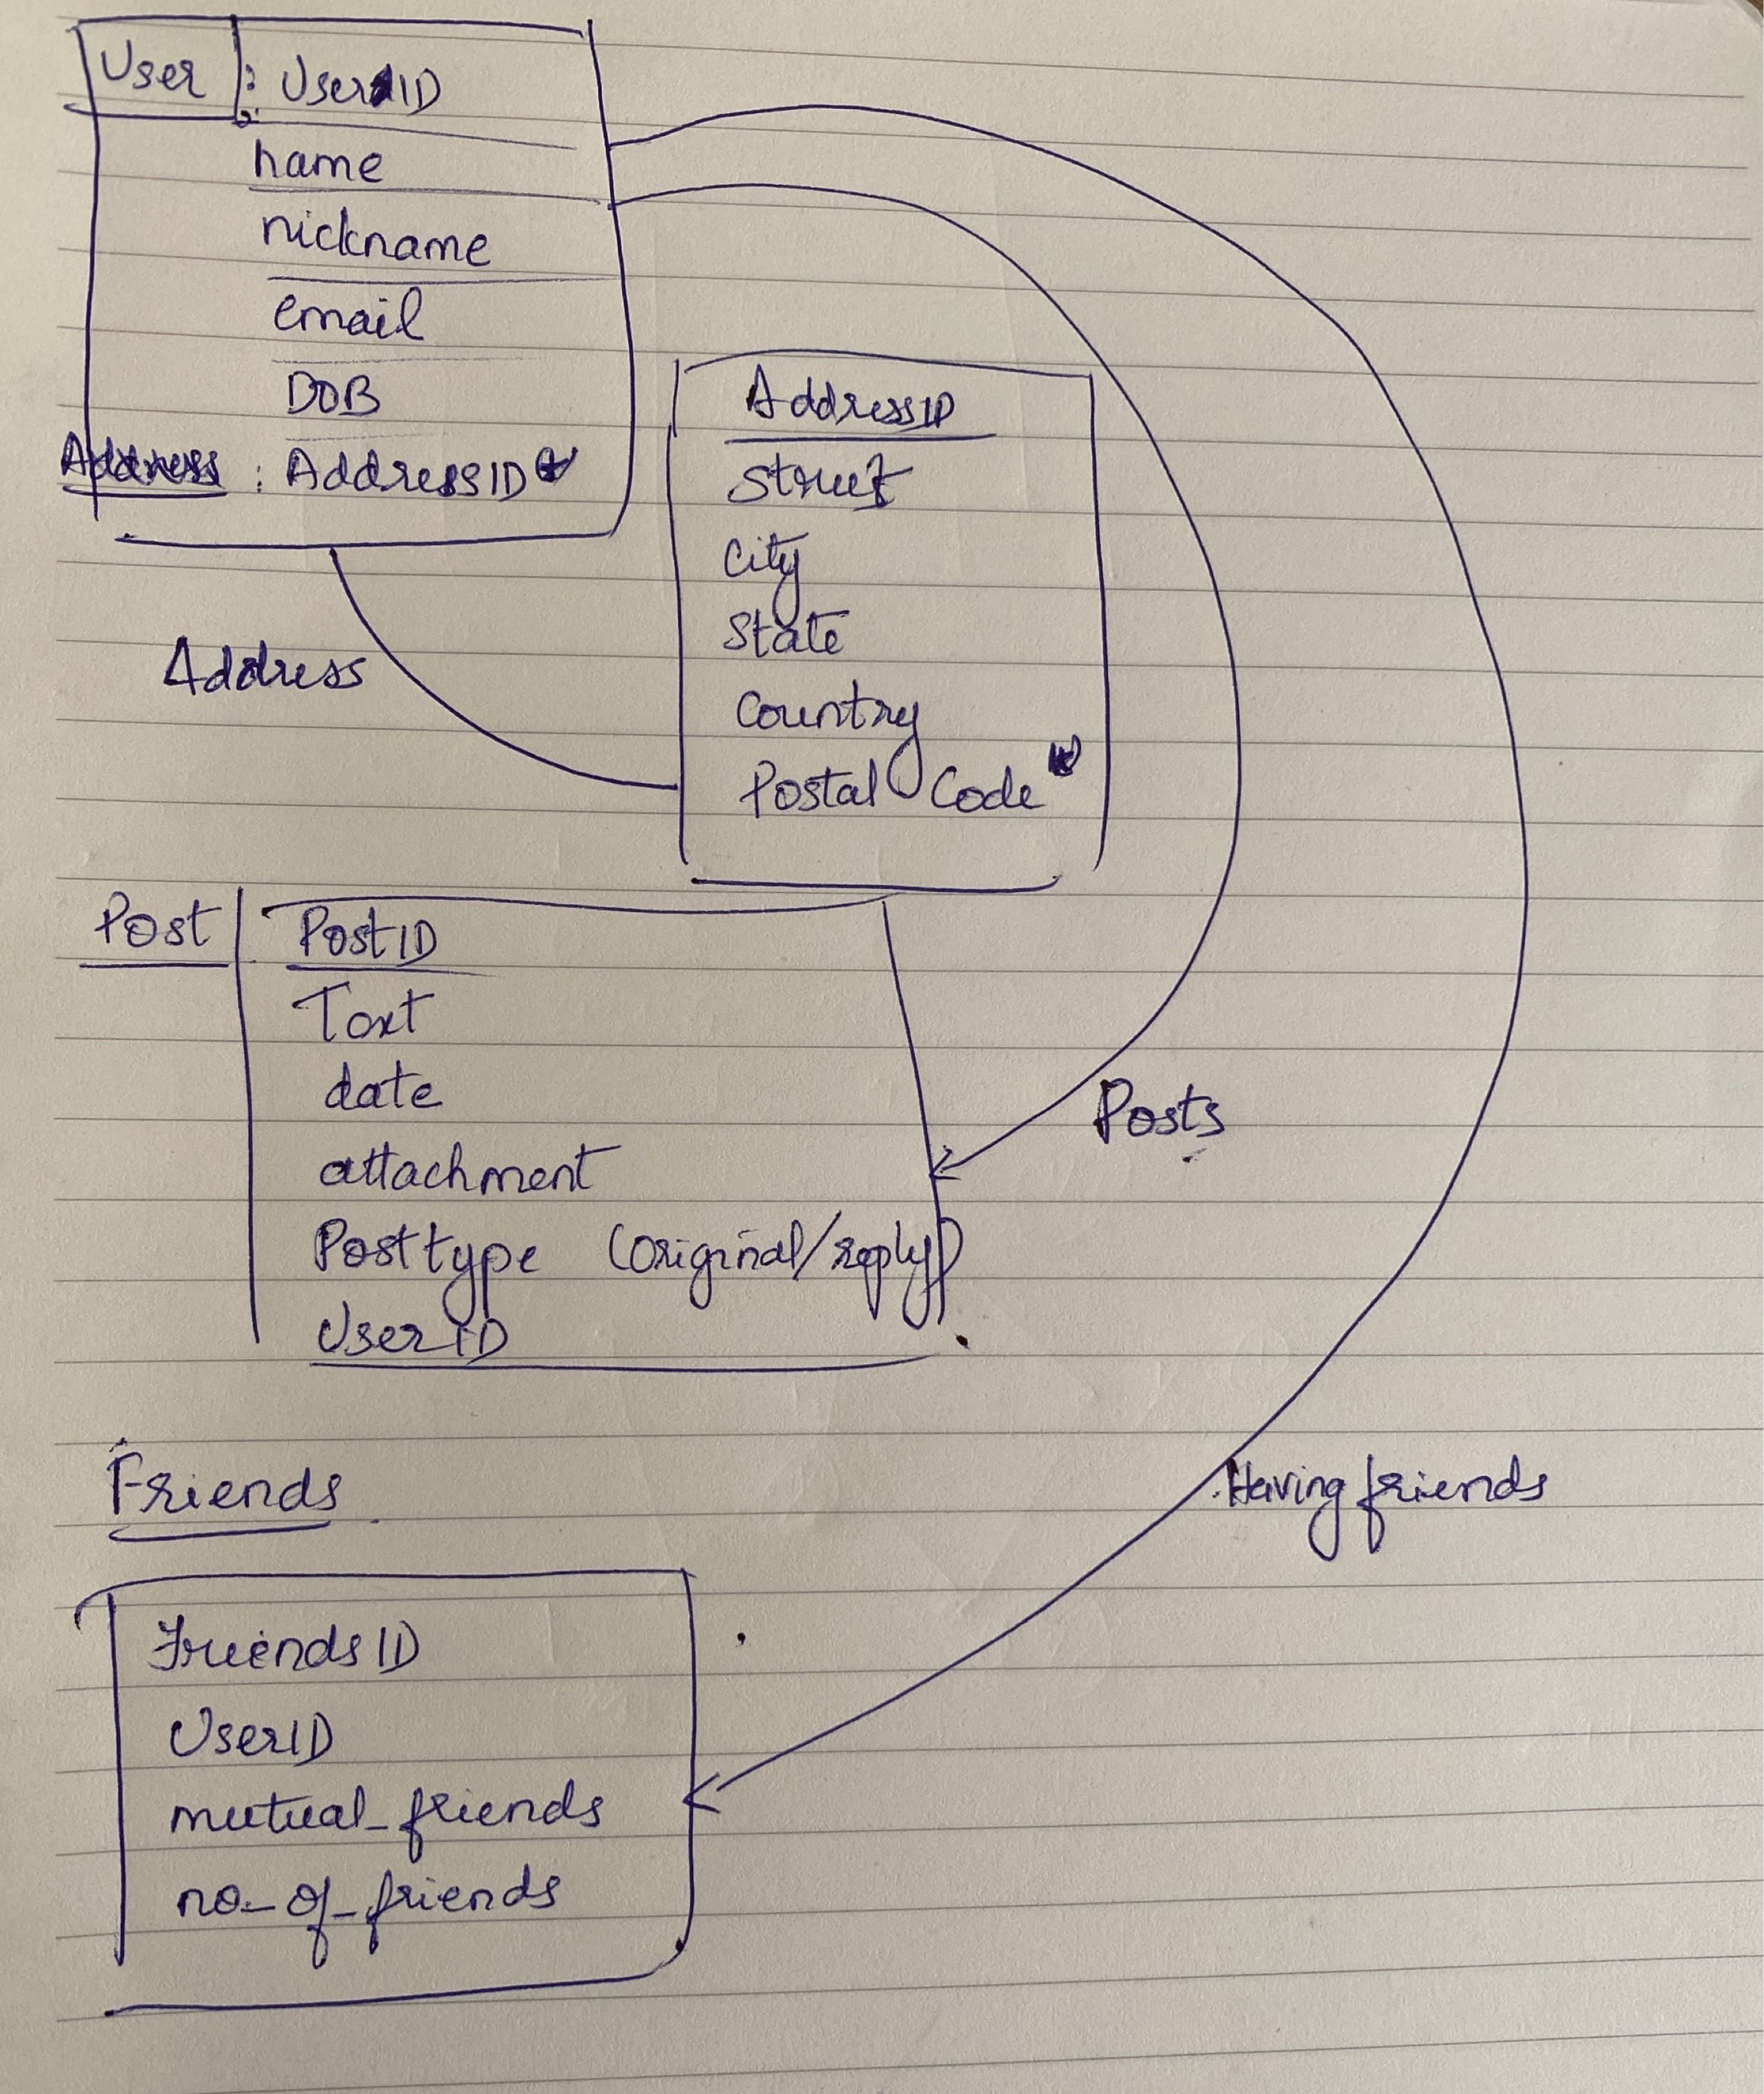

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

In [ ]:
CREATE VIEW AS
SELECT postid, text, date, attachement, posttype
FROM Posts, Users, Friends
WHERE Posts.userid = Users.userid
      AND
      Users.userid = Friends.userid
ORDER BY mutual_friends DESC, no_of_friends DESC
LIMIT 100
